### PDF Sampling: MCMC Metropolis-Hastings

We use a proposal distribution $Q(x' | x^{(t)})$ to generate a proposed next state $x'$ based on current state $x^{(t)}$.

<strong>Metropolis-Hastings Algorithm:</strong>
0. Initiate state $x^{(t=0)}$
1. Generate a proposed state from $Q(x' | x^{(t)})$
2. Compute $a = \frac{f^{*}(x')}{f^{*}(x^{(t)})} \frac{Q(x^{(t)} | x')}{Q(x' | x^{(t)})}$
3. If $a \ge 1$ accept proposed state $x'$
4. Otherwise, generate $u$ from a uniform distribution in interval $[0, 1]$ and accept the proposed state if $a \ge u$.
5. If the state is accepted, we set $x^{(t+1)} = x'$
6. If the state is rejected, stick to the previous state and set $x^{(t+1)} = x^{(t)}$

Note that if $Q(x' | x^{(t)})$ is symmetric, the ratio of $\frac{Q(x^{(t)} | x')}{Q(x' | x^{(t)})}$ is always 1.

> * SEAYAC Workshop, *MC methods in astronomy*, Tri L. Astraatmadja (MPIA Heidelberg)
  Krabi, 4 December 2015

In [1]:
import math
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def pdftarget(x, norm=1):
    return np.exp(0.4*(x-0.4)*(x-0.4) - 0.08*x*x*x*x)/norm

In [3]:
def sampling_mcmc_mh(xt, stepsize, nsamp):
    samples = np.empty(nsamp)
    accept = np.empty(nsamp)
    for i in range(nsamp):
        xprime = xt + stepsize*np.random.normal() # gaussian proposal distribution
        a = pdftarget(xprime)/pdftarget(xt) # symmetric -> gaussian
        if a >= 1.0:
            xt = xprime
            accept[i] = 1
        else:
            u = np.random.random()
            if a >= u:
                xt = xprime
                accept[i] = 1
            else:
                accept[i] = 0 # reject xprime, xt = xt
        
        samples[i] = xt
        
    return samples, accept

### Let's try it

In [4]:
mu = 0
sigma = 2
nsamp = 10000

samples, accept = sampling_mcmc_mh(mu, sigma, nsamp)

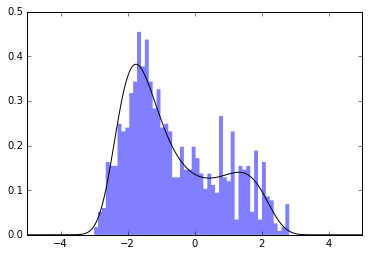

In [5]:
nbins = 50
xmin, xmax = -5, 5

I = quad(pdftarget, -100, +100)
x = np.linspace(xmin, xmax, 1000)
y = pdftarget(x, I[0])

plt.hist(samples, bins=nbins, normed=True, histtype="stepfilled", color="blue", alpha=0.5, linewidth=0)
plt.plot(x, y, 'k')
plt.xlim([xmin, xmax])
plt.show()

### Make an animation

In [7]:
def plot_samples(samples, accept, stepsize, x, target_dist, xmin=-5, xmax=5, nbins=50, write=False, filename="plot_samp_mcmc.png", trace=False):
    nsamples = len(samples)
    ofile = '/home/ridlo/project/stats/mcmc_sampling/'+filename 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(xmin, xmax)
    
    #x = np.linspace(xmin, xmax, 1000) 
    #target_dist = pdftarget(x, normed=normalize)
    max_propdist = norm.pdf(0, 0, stepsize) # to draw line
    
    ymax = 1.1*np.amax(target_dist)
    ax.set_ylim(0, ymax)
    
    ax.plot(x, target_dist, 'k') # draw target dist line
    if nsamples > 1:
        ax.hist(samples, normed=True, bins=nbins, histtype="stepfilled", color="blue", alpha=0.5, linewidth=0)
        if trace:
            last_state = samples[-1] # last sample 
            last_acc = accept[-1]
            prev_state = samples[-2]
            prev_acc = accept[-2]
            
            ax.plot(x, norm.pdf(x, prev_state, stepsize), 'g') # draw previous propos dist
            ax.axvline(x=prev_state, ymin=0, ymax=(max_propdist)/(ymax), c='g')
            
            color = 'r'
            if last_acc > 0: color = 'k'     
            ax.axvline(x=last_state, ymin=0, ymax=(norm.pdf(last_state, prev_state, stepsize))/(ymax), c=color)

        ratio_accept = float(len(samples[accept>0]))/float(nsamples)
        text = r'$n_{sample} = '+'{0:d}$'.format(nsamples)+'\n'
        text += r'$r_{accept} = '+'{0:0.2f}$'.format(ratio_accept)
        ax.annotate(text, xy=(0.7, 0.97), xycoords='axes fraction', ha='left', va='top') 
    
    if write:
        plt.savefig(ofile, bbox_inches='tight', dpi=400); plt.close()
    else:
        plt.show(); plt.close()

In [8]:
# Test
mu = 0
sigma = 2
nsamp = 1000
samples, accept = sampling_mcmc_mh(mu, sigma, nsamp)

I = quad(pdftarget, -100, +100)
x = np.linspace(xmin, xmax, 1000)
y = pdftarget(x, I[0])

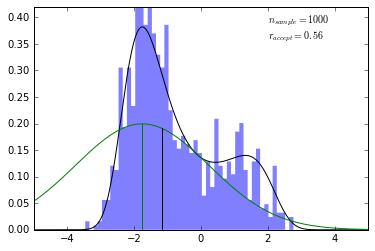

In [9]:
plot_samples(samples, accept, sigma, x, y, trace=True)

In [10]:
# make an animation
divisor = 10
for i in range(nsamp):
    plot_samples(samples[0:i], 
                 accept[0:i], 
                 sigma, 
                 x, y, 
                 write=True,
                 filename='plotsample_nsamp_{0:04d}.png'.format(i),
                 trace=True)
    
    if (((i+1) % divisor) == 0):
        print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [1]:
from IPython.display import YouTubeVideo

In [2]:
YouTubeVideo("zL2lg_Nfi80")

### Reference

- SEAYAC Workshop, *MC methods in astronomy*, Tri L. Astraatmadja (MPIA Heidelberg)
    Krabi, 4 December 2015